In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [250]:
data=pd.read_csv('/content/bank-full.csv')

In [251]:
#EDA
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [252]:
data.shape

(45211, 17)

In [253]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [254]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [256]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [257]:
data1 = data.drop(["day","month","duration"], axis=1)

In [258]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,1,-1,0,unknown,no


In [259]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   campaign   45211 non-null  int64 
 10  pdays      45211 non-null  int64 
 11  previous   45211 non-null  int64 
 12  poutcome   45211 non-null  object
 13  Target     45211 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [260]:
data1.shape

(45211, 14)

<Axes: xlabel='Target', ylabel='count'>

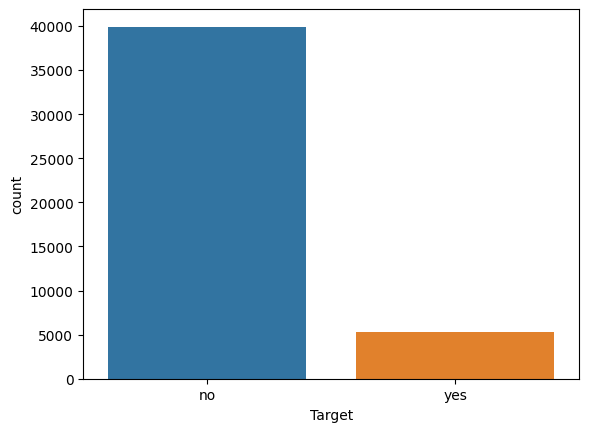

In [261]:
sns.countplot(x='Target',data=data)

<Axes: xlabel='job', ylabel='count'>

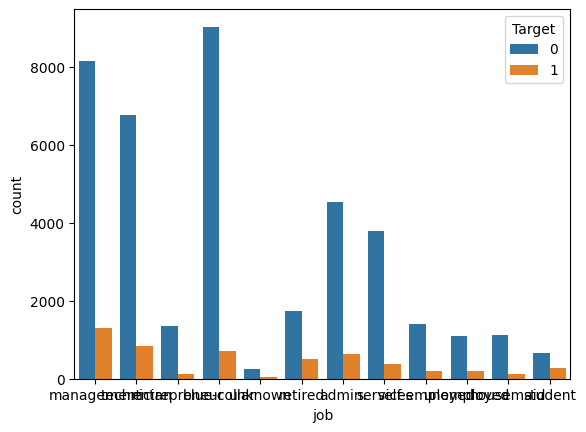

In [262]:
sns.countplot(x='job',data=data,hue = y)

<Axes: xlabel='Target', ylabel='age'>

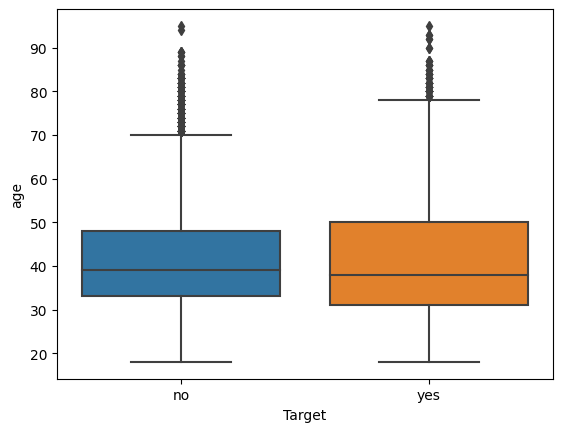

In [263]:
sns.boxplot(data=data,x='Target',y='age')


<Axes: xlabel='loan', ylabel='count'>

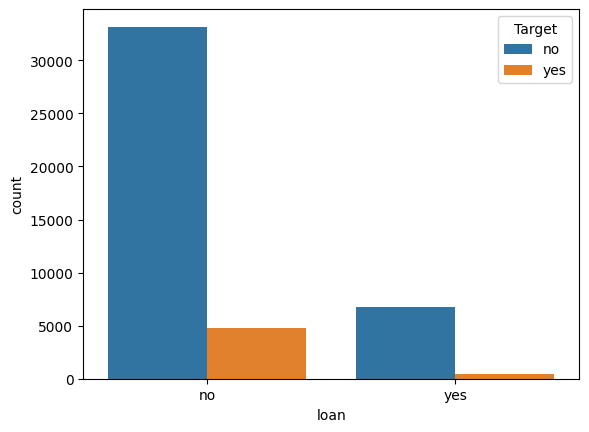

In [264]:
sns.countplot(x="loan",data=data,hue = 'Target')

<Axes: xlabel='education', ylabel='count'>

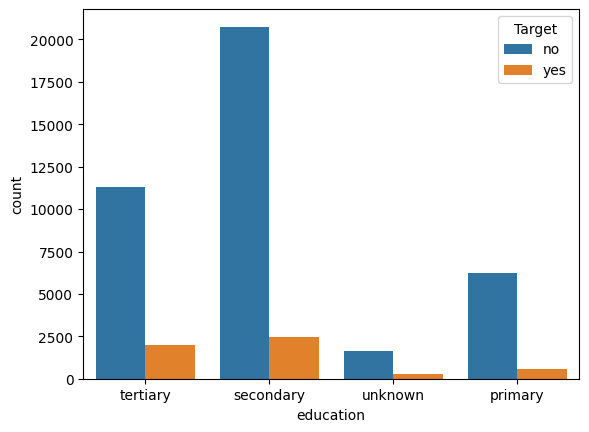

In [265]:
sns.countplot(x="education",data=data,hue = 'Target')

<Axes: xlabel='default', ylabel='count'>

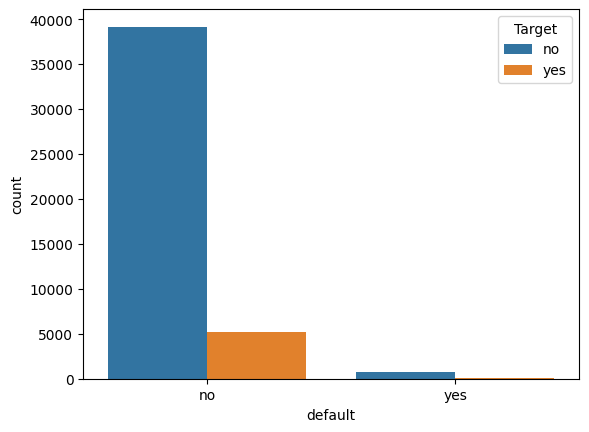

In [266]:
sns.countplot(x="default",data=data,hue = 'Target')

<Axes: xlabel='housing', ylabel='count'>

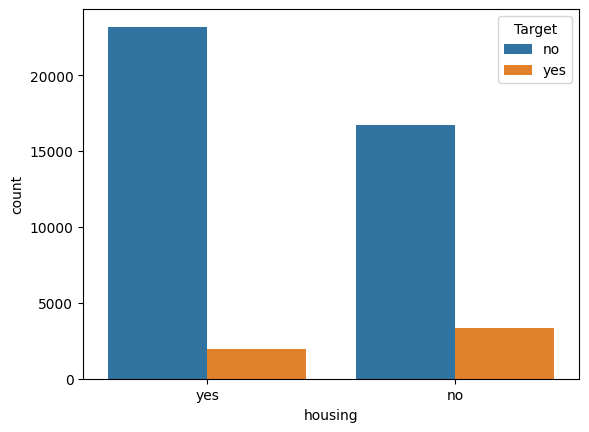

In [267]:
sns.countplot(x="housing",data=data,hue = 'Target')

<Axes: xlabel='contact', ylabel='count'>

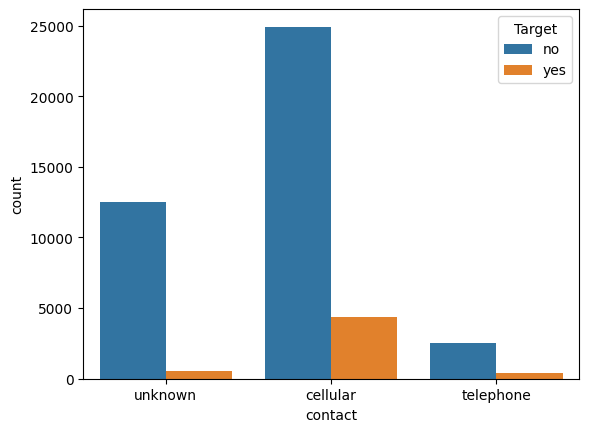

In [268]:
sns.countplot(x="contact",data=data,hue = 'Target')

<Axes: xlabel='poutcome', ylabel='count'>

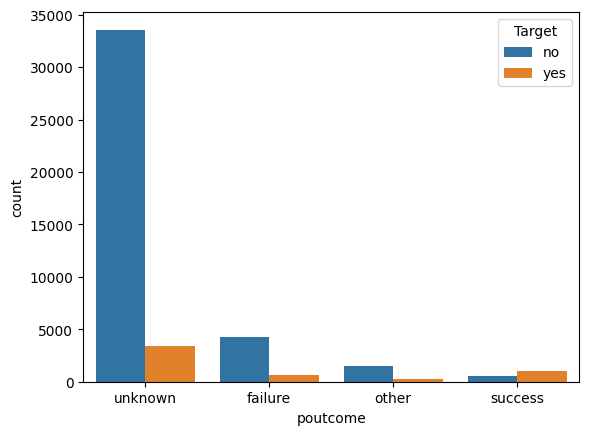

In [269]:
sns.countplot(x="poutcome",data=data,hue = 'Target')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

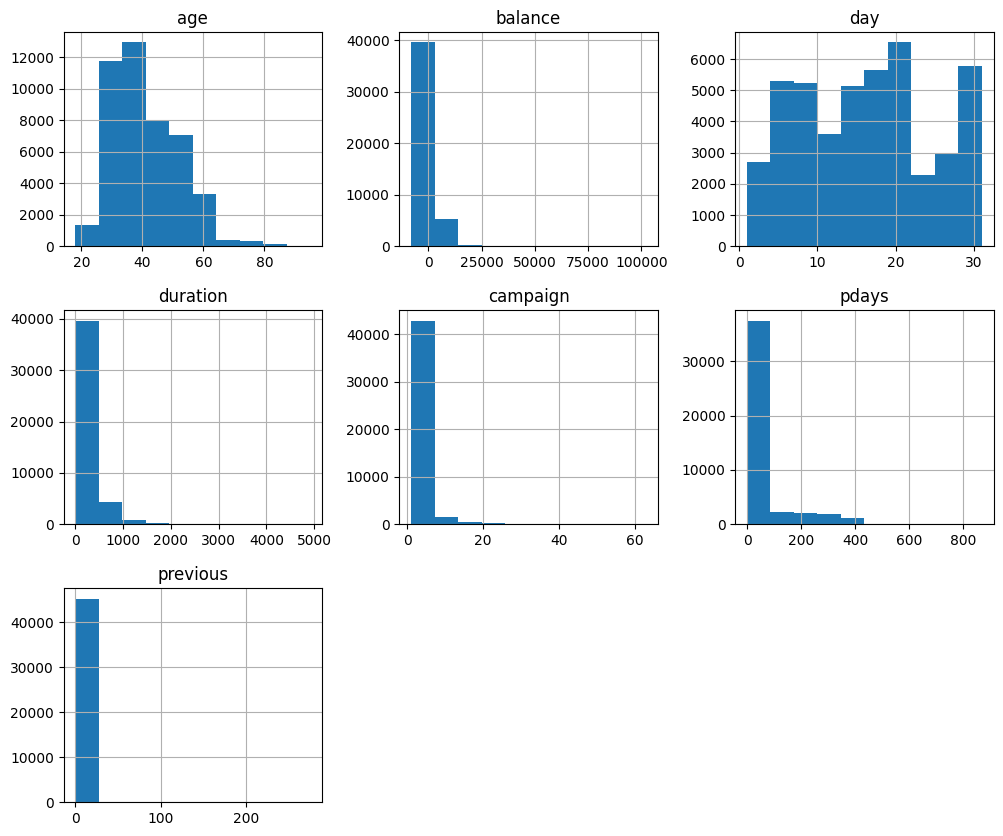

In [270]:
data.hist(figsize=(12,10))

Data Preprocessing

In [271]:
data[['job','marital','education','default','housing','loan','contact','poutcome','month','Target']] = data[['job','marital','education','default','housing','loan','contact','poutcome','month','Target']].astype('category')
data1 = data

In [272]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [273]:
#Label Encoding

data1['month'] = data1['month'].cat.codes
data1['job'] = data1['job'].cat.codes
data1['marital'] = data1['marital'].cat.codes
data1['education'] = data1['education'].cat.codes
data1['default'] = data1['default'].cat.codes
data1['housing'] = data1['housing'].cat.codes
data1['loan'] = data1['loan'].cat.codes
data1['contact'] = data1['contact'].cat.codes
data1['poutcome'] = data1['poutcome'].cat.codes
data1['Target'] = data1['Target'].cat.codes

In [274]:
x = data1.iloc[:,:-1]
y = data1.iloc[:,16]
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [275]:
x1 = x.clip(lower=0)

In [276]:
data1.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [277]:
datax = x1[['duration', 'balance', 'pdays', 'previous', 'contact', 'campaign', 'housing', 'job', 'loan', 'day']]
datax.head(5)

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
0,261,2143,0,0,2,1,1,4,0,5
1,151,29,0,0,2,1,1,9,0,5
2,76,2,0,0,2,1,1,2,1,5
3,92,1506,0,0,2,1,1,1,0,5
4,198,1,0,0,2,1,0,11,0,5


In [278]:
datax.describe()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,258.163080,1388.734069,41.015195,0.580323,0.640242,2.763841,0.555838,4.339762,0.160226,15.806419
std,257.527812,3029.530442,99.792615,2.303441,0.897951,3.098021,0.496878,3.272657,0.366820,8.322476
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,103.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,8.000000
50%,180.000000,448.000000,0.000000,0.000000,0.000000,2.000000,1.000000,4.000000,0.000000,16.000000
75%,319.000000,1428.000000,0.000000,0.000000,2.000000,3.000000,1.000000,7.000000,0.000000,21.000000
max,4918.000000,102127.000000,871.000000,275.000000,2.000000,63.000000,1.000000,11.000000,1.000000,31.000000


In [279]:
datax.corr()

,duration,balance,pdays,previous,contact,campaign,housing,job,loan,day
duration,1.000000,0.021325,-0.001584,0.001203,-0.020839,-0.084570,0.005075,0.004744,-0.012412,-0.030206
balance,0.021325,1.000000,0.002627,0.016018,-0.025614,-0.014164,-0.065279,0.017850,-0.079532,0.005788
pdays,-0.001584,0.002627,1.000000,0.454288,-0.244526,-0.088508,0.124350,-0.024531,-0.022709,-0.093024
previous,0.001203,0.016018,0.454288,1.000000,-0.147811,-0.032855,0.037076,-0.000911,-0.011043,-0.051710
contact,-0.020839,-0.025614,-0.244526,-0.147811,1.000000,0.019614,0.188123,-0.082063,-0.010873,-0.027936
campaign,-0.084570,-0.014164,-0.088508,-0.032855,0.019614,1.000000,-0.023599,0.006839,0.009980,0.162490
housing,0.005075,-0.065279,0.124350,0.037076,0.188123,-0.023599,1.000000,-0.125363,0.041323,-0.027982
job,0.004744,0.017850,-0.024531,-0.000911,-0.082063,0.006839,-0.125363,1.000000,-0.033004,0.022856
loan,-0.012412,-0.079532,-0.022709,-0.011043,-0.010873,0.009980,0.041323,-0.033004,1.000000,0.011370
day,-0.030206,0.005788,-0.093024,-0.051710,-0.027936,0.162490,-0.027982,0.022856,0.011370,1.000000


MODEL BUILDING


In [280]:
model=LogisticRegression()
model.fit(datax,y)

LogisticRegression()

In [281]:
y_pred=model.predict(datax)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [282]:
y_pred_df=pd.DataFrame({'actual':y,'predicted_prob':model.predict(datax)})

In [283]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


MODEL VALIDATION


In [284]:
confusion_matrix=confusion_matrix(y,y_pred)

In [285]:
confusion_matrix

array([[39272,   650],
       [ 4438,   851]])

In [286]:
#  to check accuracy (TP/All Pred)*100
((39272+851)/(39272+650+4438+851))*100

88.74610161243946

In [287]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [288]:
auc=roc_auc_score(y,y_pred)
auc

0.5723091158407411

In [289]:
proba=model.predict_proba(datax)

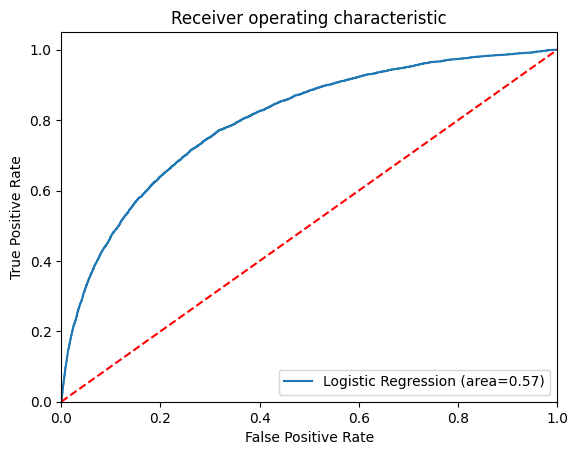

In [290]:
fpr, tpr, thresholds = roc_curve(y,proba[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc)
plt.plot([0, 1], [0, 1],'r--')     # 'r--' : red coloured dash line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [291]:
model1=LogisticRegression(C=20.0,random_state=1)
model1.fit(datax,y)

LogisticRegression(C=20.0, random_state=1)

In [292]:
new_prob = model1.predict_proba(datax)
new_prob

array([[0.96748964, 0.03251036],
       [0.98193716, 0.01806284],
       [0.98618547, 0.01381453],
       ...,
       [0.34714673, 0.65285327],
       [0.88745323, 0.11254677],
       [0.84478033, 0.15521967]])

In [293]:
y_pred1=model.predict(datax)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [294]:
model1.score(datax,y)

0.8890093118931234

In [295]:
print(classification_report(y,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.59     45211
weighted avg       0.86      0.89      0.86     45211



In [296]:
auc1 = roc_auc_score(y, y_pred1)
auc1


0.5723091158407411

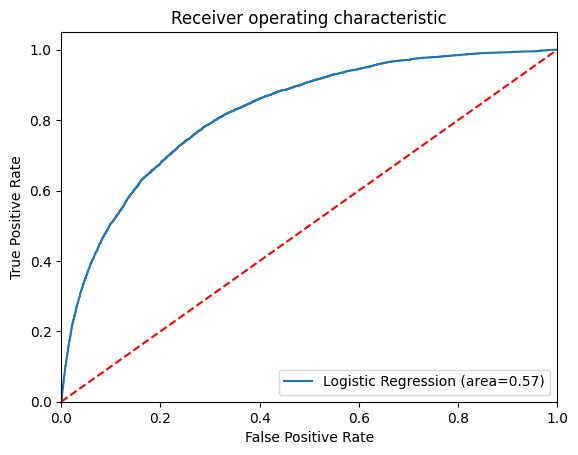

In [297]:
fpr, tpr, thresholds = roc_curve(y,new_prob[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [298]:
datax.shape

(45211, 10)

In [299]:
y.shape

(45211,)

X TRAIN AND X TEST


In [300]:
x2 = datax.values
y2 = y.values

In [301]:
xtrain, xtest, ytrain, ytest = train_test_split(x2, y2, test_size = 0.20, random_state = 10)

In [302]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [303]:
print(xtrain[0:5,:])

[[-0.30738733 -0.45356646 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326  1.42538934 -0.43702462  0.62689417]
 [-0.29571388  0.01207209 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326 -1.01971428  2.28820062 -0.93643115]
 [-0.92218909 -0.40758954 -0.41189017 -0.24419181  1.51764318  2.34210565
   0.89399326 -1.01971428  2.28820062 -0.21489639]
 [ 0.43193125 -0.35900401 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [-0.33073423  2.16809592 -0.41189017 -0.24419181 -0.71144243 -0.24894678
   0.89399326 -1.01971428 -0.43702462 -0.33515218]]


In [304]:
print(xtest[0:5,:])

[[ 0.41636665 -0.45356646 -0.41189017 -0.24419181  1.51764318  0.39881633
   0.89399326  1.42538934 -0.43702462  0.50663838]
 [-0.73930502  0.13989443 -0.41189017 -0.24419181  1.51764318 -0.57282833
   0.89399326  0.50847548 -0.43702462  0.50663838]
 [ 2.52147902  0.28108595 -0.41189017 -0.24419181  1.51764318 -0.24894678
   0.89399326 -0.10280042 -0.43702462  0.26612679]
 [-0.25291122  1.97538417 -0.41189017 -0.24419181 -0.71144243 -0.57282833
   0.89399326  1.42538934 -0.43702462 -1.05668694]
 [ 0.69652948 -0.43432789 -0.41189017 -0.24419181  1.51764318 -0.24894678
  -1.11857666 -0.71407633 -0.43702462 -0.33515218]]


MODEL BUILDING

In [305]:
model2=LogisticRegression(C=15,random_state=10)
model2.fit(xtrain,ytrain)

LogisticRegression(C=15, random_state=10)

In [306]:
y_pred2=model2.predict(xtest)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [307]:
y_prob3=model2.predict_proba(xtest)
y_prob3


array([[0.97617573, 0.02382427],
       [0.98889555, 0.01110445],
       [0.78731011, 0.21268989],
       ...,
       [0.95289748, 0.04710252],
       [0.96570604, 0.03429396],
       [0.85684879, 0.14315121]])

MODEL VALIDATION

In [308]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred2)

0.8917394669910428

In [309]:
auc2=roc_auc_score(ytest, y_pred2)
auc2

0.5925810539983157

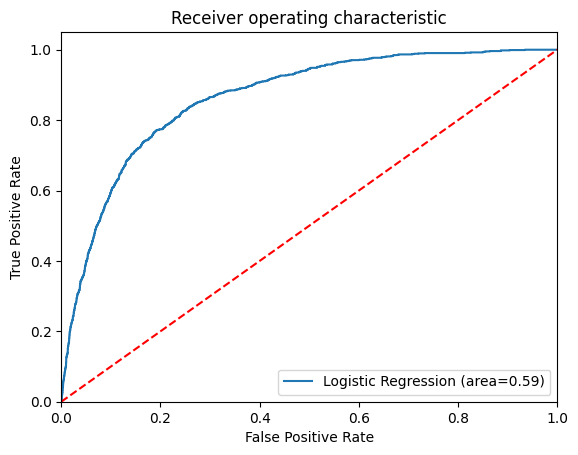

In [310]:
fpr, tpr, thresholds = roc_curve(ytest,y_prob3[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [311]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7994
           1       0.60      0.20      0.30      1049

    accuracy                           0.89      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043

